<a href="https://colab.research.google.com/github/PuskarJana01/AI-Assistant/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing **Dependencies**


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


**Loding the MNIST data from keras.datasets**

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
type(X_train)

numpy.ndarray

In [5]:
#Shape of numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000 Images

Testing Data = 10,000 Images

Image dimension--> 28x28

Grayscale Image--> 1channel

In [7]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


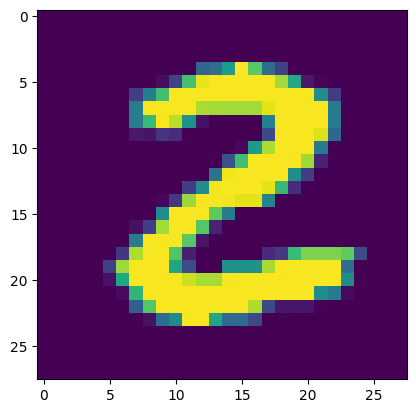

2


In [9]:
# displaying the image
plt.imshow(X_train[25])
plt.show()
#print the corresponding label
print(Y_train[25])

Image Lables

In [10]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [12]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply one hot encoding.

All the images have the same dimensions in this dataset, If not ,we have to resize all the image to a common dimension

In [13]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [14]:
#now printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Nural Network**

In [15]:
# setting up the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# training the Neural Network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8561 - loss: 0.5017
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9573 - loss: 0.1459
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9698 - loss: 0.1033
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9761 - loss: 0.0812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0667
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9844 - loss: 0.0549
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9865 - loss: 0.0470
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9884 - loss: 0.0394
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9893 - loss: 0.0357
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0314


Traing data accuracy = 99.03%


**Accuracy on Test data:**

In [18]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9692 - loss: 0.1320
0.9729999899864197


Test data accuracy= 97.1%


In [19]:
print(X_test.shape)

(10000, 28, 28)


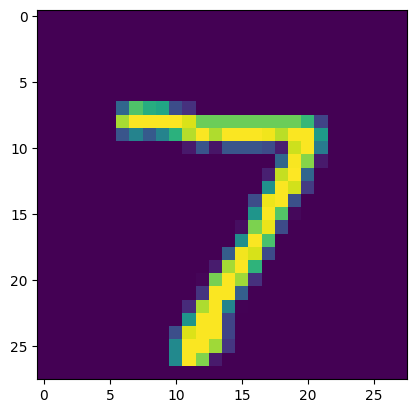

In [20]:
# first data point in X-test
plt.imshow(X_test[0])
plt.show()

In [21]:
print(Y_test[0])

7


In [22]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
print(Y_pred.shape)

(10000, 10)


In [24]:
print(Y_pred[0])

[3.87226137e-05 3.22489330e-04 3.19183193e-04 3.86824369e-01
 1.14084415e-07 3.26686515e-03 9.11643689e-15 9.99999940e-01
 2.13182459e-04 6.15368113e-02]


model.predict() gives the prediction.probablity of each class for each data point

In [25]:
# converting the prediction probablity to class label
label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)


7


In [26]:
# converting the prediction probabilities to class
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [27]:
print(Y_pred)

[[3.8722614e-05 3.2248933e-04 3.1918319e-04 ... 9.9999994e-01
  2.1318246e-04 6.1536811e-02]
 [1.7760589e-05 8.2824945e-01 1.0000000e+00 ... 9.7065106e-07
  3.2946878e-05 1.2830951e-15]
 [3.2791777e-05 9.9972868e-01 2.8627273e-01 ... 9.4834723e-02
  4.1106942e-01 7.1212889e-05]
 ...
 [5.6614796e-10 8.1412548e-09 3.3979006e-08 ... 4.4557364e-03
  6.4447880e-02 2.1307084e-01]
 [8.2028073e-09 8.5117295e-05 1.6339979e-07 ... 4.4141691e-02
  2.5961214e-01 1.9941517e-06]
 [2.1373981e-03 6.2271945e-12 1.2114690e-07 ... 1.9123227e-09
  4.5821456e-05 5.3315419e-09]]


Y_test --> True labels

Y_pred_lables--> Predict Labels

Confusin Matrix

In [28]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [29]:
print(conf_mat)

tf.Tensor(
[[ 951    1    1    0    1    1    6    6    2   11]
 [   0 1119    1    5    1    0    2    1    6    0]
 [   3    3  999    4    3    0    4    9    7    0]
 [   0    0    4  993    2    4    0    4    3    0]
 [   0    0    9    0  960    0    4    2    3    4]
 [   2    0    0   10    0  862    8    0    9    1]
 [   2    2    2    1    5    5  938    1    2    0]
 [   1    4    9    2    3    0    0 1004    1    4]
 [   3    1    4    8    5    3    3    4  943    0]
 [   2    2    0    6   16    3    1    8   10  961]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

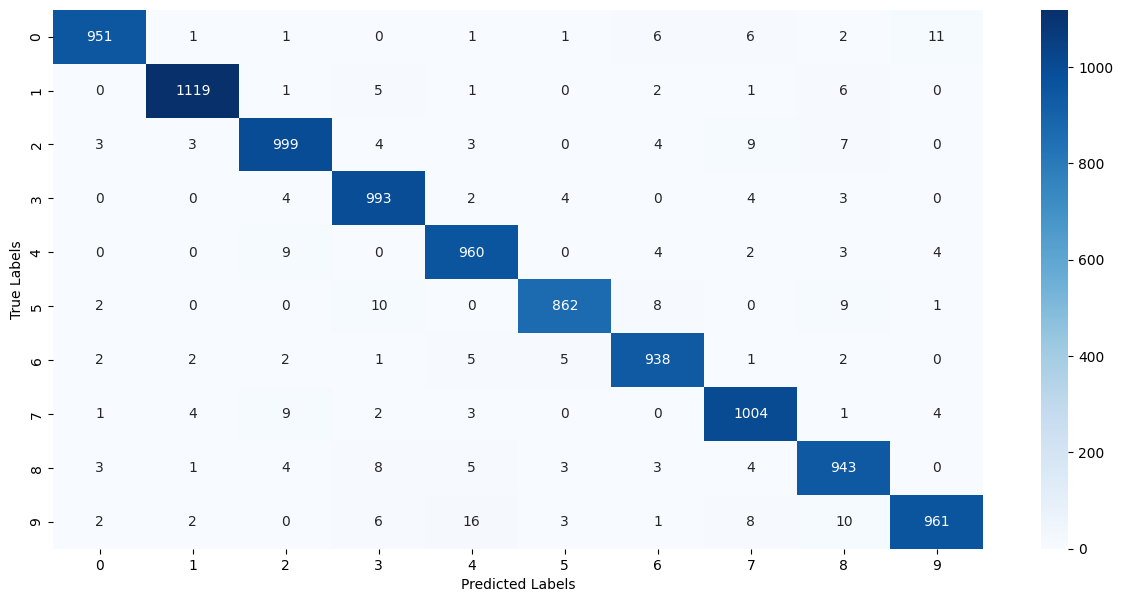

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


**Building a predictive System**

In [59]:
input_image_path = "/content/digitPic.png"
input_image = cv2.imread(input_image_path)

In [45]:
import cv2
print(cv2.__version__)


4.10.0


In [60]:
type(input_image)

numpy.ndarray

In [61]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


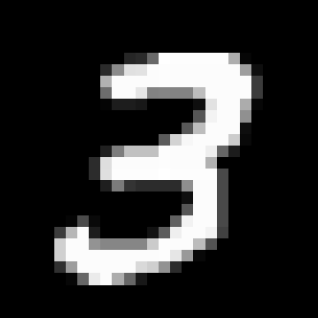

In [80]:
cv2_imshow(input_image)

In [63]:
input_image.shape

(318, 318, 3)

In [64]:
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [65]:
grayscale.shape

(318, 318)

In [67]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [68]:
input_image_resize.shape

(28, 28)

In [69]:
cv2_imshow(input_image_resize)

In [71]:
input_image_resize = input_image_resize/255

In [72]:
type(input_image_resize)

numpy.ndarray

In [73]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [74]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.29593343 0.33075893 0.31736928 0.16308106 0.47226045 0.54305655
  0.4698322  0.3702957  0.4366543  0.34464005]]


In [75]:
input_pred_label = np.argmax(input_prediction)

In [79]:
print(input_pred_label)

5


path of the imageto be predicted/content/digitPic.png


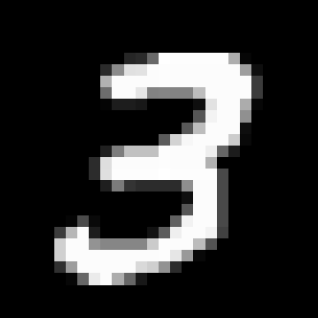

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The digit is :  3


In [81]:
input_image_path = input("path of the imageto be predicted")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize,[1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print("The digit is : ",input_pred_label)